# Input - txt file containing email address of praticipants
# Output - csv file with columns as :

# srno | Roll No | email | Department

In [56]:
import csv

input_file = open("sha3_participants.txt","r")  # input file

data = input_file.read()
data = data.split('\n')

output_file = "sha3_participants.csv"      # output file

with open(output_file, 'w') as csvfile:
  writer = csv.writer(csvfile)

  fields = ['srno','Roll No','Email','Department']
  writer.writerow(fields)
  count = 1

  for email in data:
    row = []
    rollno = email[:8]
    department = email[2:4]
    department_name=""

    if(department=='bc' or department=='ce' or department=='be'): department_name = "CSE"   # department must be in lower case
    elif(department=='ec'): department_name = "EC"
    elif(department=='cm'):department_name = "CSE-MBA"
    else: department_name = department

    row.append(count)
    row.append(rollno)
    row.append(email)
    row.append(department_name)
    writer.writerow(row)
    count += 1



# Analytics for:
# 1 - Degree wise ( btech , metch )
# 2 - year wise ( 1st, 2nd , ...)
# 3 - department wise ( cse, ec , ...)

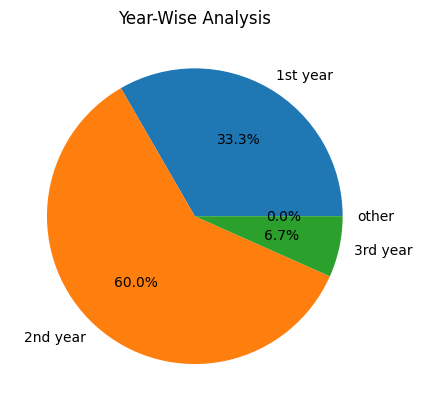

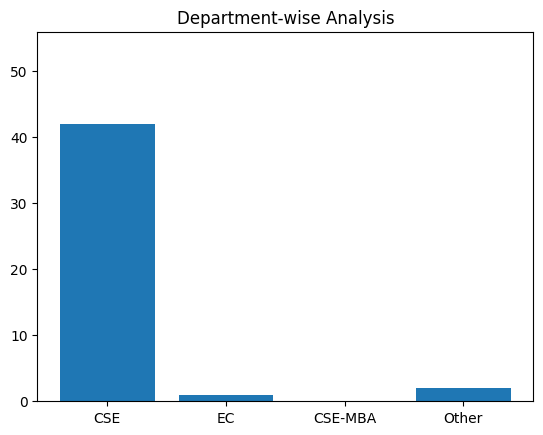

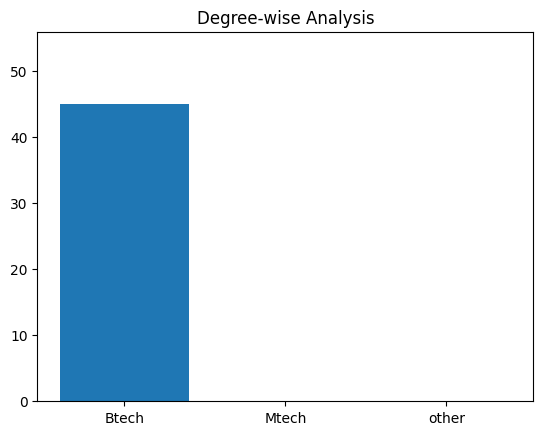

In [57]:
import matplotlib.pyplot as plt
import numpy as np

btech_cnt = 0
mtech_cnt = 0
other_degree = 0

cnt_21 = 0
cnt_22 = 0
cnt_20 = 0
other_year = 0

cse_cnt = 0
cse_mba_cnt = 0
ec_cnt = 0
other_dept_cnt = 0


for email in data:
  year = email[:2]
  if(year=='20'):cnt_20 += 1
  elif(year=='21'):cnt_21 += 1
  elif(year=='22'):cnt_22 +=1
  else: other_year += 1

  degree = email[2]
  if(degree=='m' or degree=='M'): mtech_cnt += 1
  else: btech_cnt += 1

  department = email[2:4]
  if(department=='bc' or department=='ce' or department=='be'): cse_cnt += 1   # department must be in lower case
  elif(department=='ec'): ec_cnt += 1
  elif(department=='cm'): cse_mba_cnt += 1
  else: other_dept_cnt += 1


# pie chart for year wise analysis

y = np.array([cnt_22, cnt_21, cnt_20, other_year])
years = ['1st year', '2nd year', '3rd year', 'other']

plt.pie(y,labels = years,autopct='%1.1f%%')
plt.title("Year-Wise Analysis")
plt.show()
print()

# bar chart for department wise analysis

y = np.array([cse_cnt, ec_cnt, cse_mba_cnt, other_dept_cnt])
plt.ylim(0,count+10)
x = np.arange(4)
names = ['CSE','EC','CSE-MBA','Other']

plt.bar(x,y)
plt.xticks(x,names)
plt.title("Department-wise Analysis")
plt.show()
print()

#  bar chart for Degree wise analysis

y = np.array([btech_cnt, mtech_cnt, other_degree])
plt.ylim(0,count+10)
x = np.arange(3)
degrees = ['Btech', 'Mtech', 'other']

plt.bar(x,y)
plt.xticks(x,degrees)
plt.title('Degree-wise Analysis')
plt.show()

